In [147]:
import geopandas as gpd 
import fiona
import os
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Polygon
import pandas as pd


data = gpd.read_file('./dads_Boundary.shp')
sample_data = gpd.read_file('./dads_sample_points.shp')
yieldData = gpd.read_file('christiansYieldData/zippedFiles/DadsHome20.zip')
sample_data.columns


Index(['SampleNo', 'TestDate', 'MgBaseSat', 'CaBaseSat', 'KBaseSat',
       'MAGNESIUM', 'CALCIUM', 'ZINC', 'PH', 'OM', 'CEC', 'POTASSIUM',
       'PHOSPHORUS', 'PHBUFFER', 'olsen_p', 'geometry'],
      dtype='object')

<AxesSubplot:>

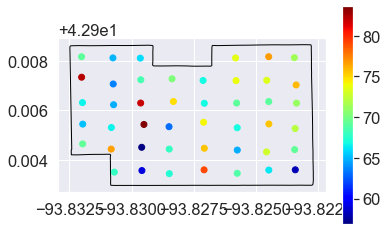

In [148]:
ax = data.plot(legend=True, edgecolor='black', facecolor='none')
sample_data.plot(ax=ax, cmap='jet', legend=True, column='CaBaseSat')

<AxesSubplot:>

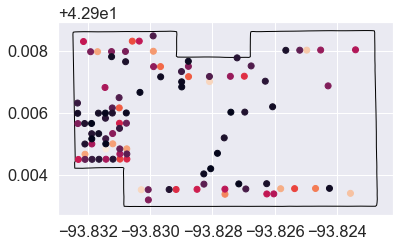

In [149]:
sorted123 = yieldData.sort_values('Yield', ascending=False)
ax = data.plot(legend=True, edgecolor='black', facecolor='none')
sorted123[:100].plot(ax=ax, column='Yield')

<AxesSubplot:>

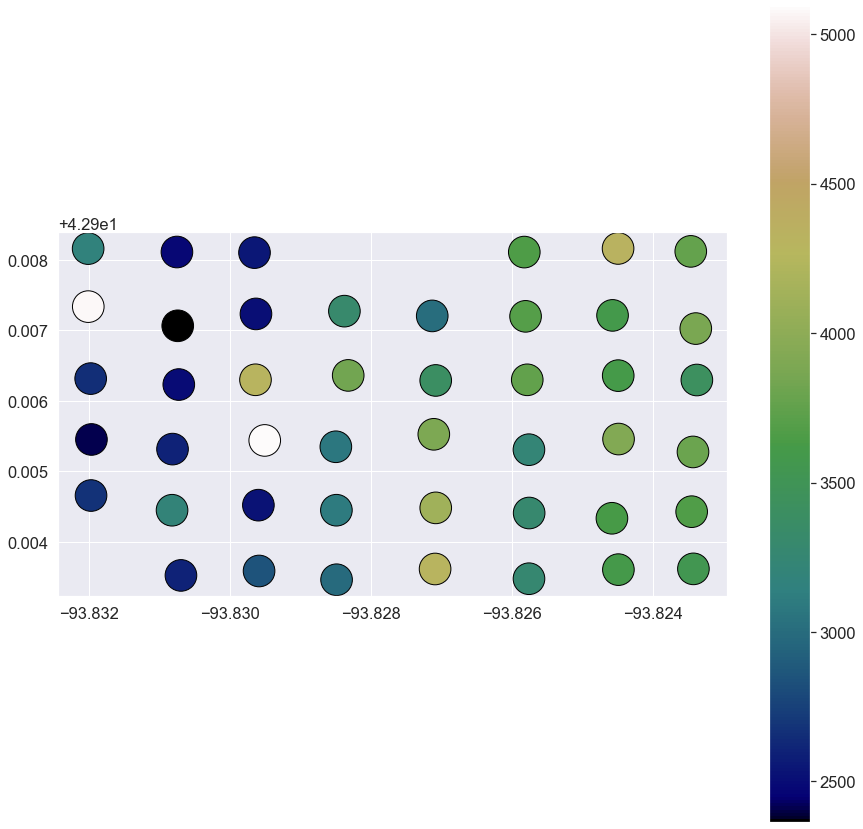

In [150]:
fig, ax = plt.subplots(1, figsize=(15,15))
sample_data.plot(ax=ax, column='CALCIUM', legend=True, cmap='gist_earth', edgecolor='black', markersize=1000)

In [151]:
#######this is for aerial images as a background image. None of the codes are working though, so may have to keep trying different ones. 
#data = data.to_crs(epsg=3417)
import contextily as ctx 

C:\Users\levio\anaconda3\envs\geo-tutorial\lib\site-packages\contextily\tile.py:632: UserWarning: The inferred zoom level of 34 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


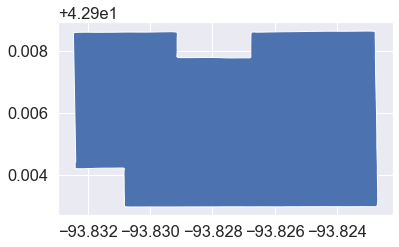

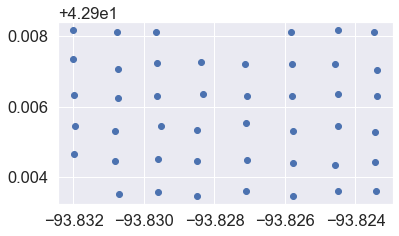

<Figure size 432x288 with 0 Axes>

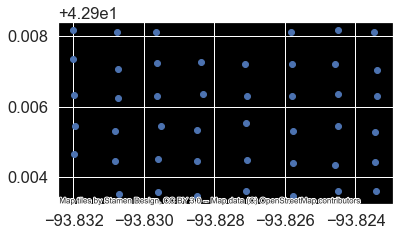

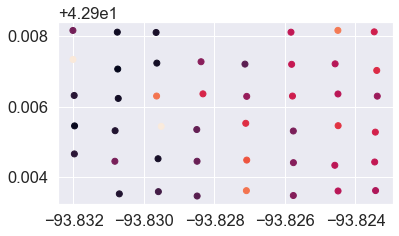

In [152]:
#tried to add basemap. Did not work
data.crs = 'epsg:3857'
x = data.copy().to_crs(data.crs).plot()
sample_data.crs = 'epsg:3857'
y = sample_data.copy().to_crs(sample_data.crs).plot()

fig = plt.figure()
ax = sample_data.plot()
x.plot(ax=ax)
y.plot(ax=ax)
sample_data.plot(column='CALCIUM')

ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.Toner)



<AxesSubplot:>

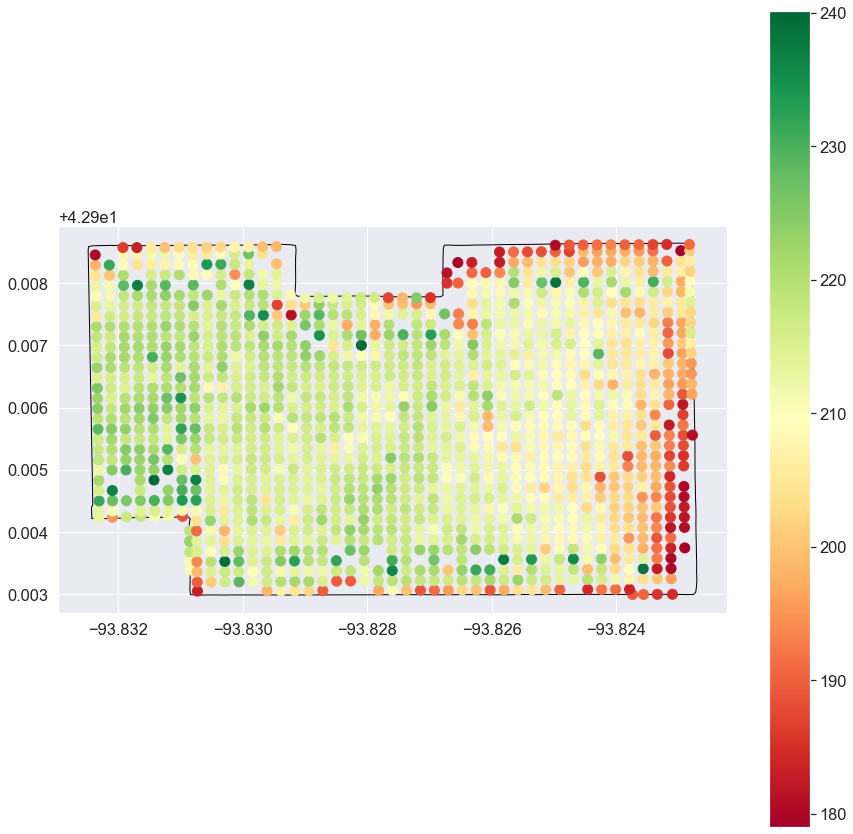

In [153]:

ax = data.plot(legend=True, edgecolor='black', facecolor='none', figsize=(15,15))
yieldData.plot(cmap='RdYlGn', legend=True, column='Yield', ax=ax, markersize=100)

In [154]:
yieldData.crs = 'epsg:3857'
yieldData.to_crs('epsg:3857')

Crop       Yield  Ident   RelYield                    geometry
0     Corn  212.868887      0  88.662062  POINT (-93.83231 42.90424)
1     Corn  213.219659      0  88.808162  POINT (-93.83232 42.90434)
2     Corn  231.483387      0  96.415191  POINT (-93.83231 42.90450)
3     Corn  215.762693      0  89.867362  POINT (-93.83231 42.90466)
4     Corn  221.955379      0  92.446678  POINT (-93.83231 42.90483)
...    ...         ...    ...        ...                         ...
1357  Corn  209.456015      0  87.240566  POINT (-93.82281 42.90803)
1358  Corn  202.040297      0  84.151844  POINT (-93.82281 42.90819)
1359  Corn  206.603109      0  86.052301  POINT (-93.82282 42.90836)
1360  Corn  201.181402      0  83.794105  POINT (-93.82282 42.90852)
1361  Corn  191.156426      0  79.618600  POINT (-93.82282 42.90862)

[1362 rows x 5 columns]

In [155]:
allTable = gpd.sjoin(yieldData, data)
allTable.head()

Crop       Yield  Ident   RelYield                    geometry  \
0  Corn  212.868887      0  88.662062  POINT (-93.83231 42.90424)   
1  Corn  213.219659      0  88.808162  POINT (-93.83232 42.90434)   
2  Corn  231.483387      0  96.415191  POINT (-93.83231 42.90450)   
3  Corn  215.762693      0  89.867362  POINT (-93.83231 42.90466)   
4  Corn  221.955379      0  92.446678  POINT (-93.83231 42.90483)   

   index_right        GROWER_NAM  FARM_NAME FIELD_NAME  
0            0  Christians Farms  Dads Home    NWR05NW  
1            0  Christians Farms  Dads Home    NWR05NW  
2            0  Christians Farms  Dads Home    NWR05NW  
3            0  Christians Farms  Dads Home    NWR05NW  
4            0  Christians Farms  Dads Home    NWR05NW

In [156]:
#drop index that was created 
allTable.drop(columns=['index_right'], axis=1, inplace=True)
allTable.head()

Crop       Yield  Ident   RelYield                    geometry  \
0  Corn  212.868887      0  88.662062  POINT (-93.83231 42.90424)   
1  Corn  213.219659      0  88.808162  POINT (-93.83232 42.90434)   
2  Corn  231.483387      0  96.415191  POINT (-93.83231 42.90450)   
3  Corn  215.762693      0  89.867362  POINT (-93.83231 42.90466)   
4  Corn  221.955379      0  92.446678  POINT (-93.83231 42.90483)   

         GROWER_NAM  FARM_NAME FIELD_NAME  
0  Christians Farms  Dads Home    NWR05NW  
1  Christians Farms  Dads Home    NWR05NW  
2  Christians Farms  Dads Home    NWR05NW  
3  Christians Farms  Dads Home    NWR05NW  
4  Christians Farms  Dads Home    NWR05NW

In [157]:
sample_data.crs = 'epsg:3857'
sample_data = sample_data.to_crs('epsg:3857')


In [158]:
#create a border around each sample data point
#buffer first argument is in meters. 1 acre = 4046 sq meters. sqrt = 63.6. capstyle=3 means square
sample_data['poly'] = sample_data['geometry'].buffer(.00034, cap_style=3)

In [159]:
sample_data['poly'][2].area


4.623999999939793e-07

In [160]:
sample_data['poly']
print(sample_data['poly'][1])


POLYGON ((-93.82305650227443 42.90736431608614, -93.82305650227443 42.90668431608614, -93.82373650227441 42.90668431608614, -93.82373650227441 42.90736431608614, -93.82305650227443 42.90736431608614))


<AxesSubplot:>

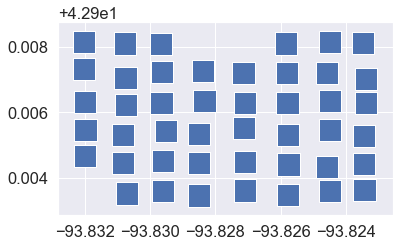

In [161]:
sample_data['poly'].plot()

<AxesSubplot:>

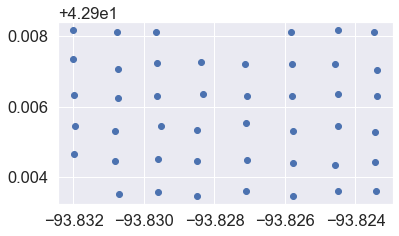

In [162]:
sample_data['geometry'].plot()

<AxesSubplot:>

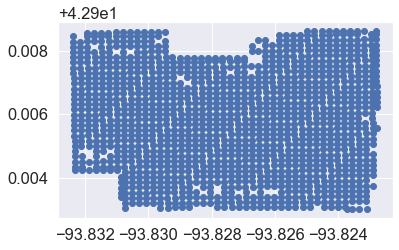

In [163]:
yieldData.plot()

In [164]:
#switch poly to geometry. Need to be named geometry to join
temp = sample_data.drop(columns='geometry', axis=1)
temp.head()

SampleNo    TestDate  MgBaseSat  CaBaseSat  KBaseSat  MAGNESIUM  CALCIUM  \
0   1690505  08/02/2019       18.4       71.4       2.1      585.0   3762.0   
1   1690506  08/02/2019       16.8       75.9       2.2      515.0   3869.0   
2   1690507  08/02/2019       18.3       71.1       2.1      530.0   3421.0   
3   1690508  08/02/2019       16.7       72.2       2.4      528.0   3795.0   
4   1690509  08/02/2019       19.5       69.4       2.1      621.0   3674.0   

   ZINC    PH   OM   CEC  POTASSIUM  PHOSPHORUS  PHBUFFER  olsen_p  \
0  3.76  6.53  4.8  24.2      217.0        54.0      7.32      0.0   
1  3.88  6.89  4.8  24.2      217.0        39.0      7.38      0.0   
2  3.35  6.48  4.9  22.0      190.0        39.0      7.32      0.0   
3  4.17  6.46  4.9  24.0      242.0        49.0      7.30      0.0   
4  3.72  6.43  4.9  24.1      216.0        41.0      7.27      0.0   

                                                poly  
0  POLYGON ((-93.82313 42.90846, -93.82313 42.907...  
1  POLYGON ((-93.82306 42.90736, -93.82306 42.906...  
2  POLYGON ((-93.82304 42.90663, -93.82304 42.905...  
3  POLYGON ((-93.82310 42.90561, -93.82310 42.904...  
4  POLYGON ((-93.82311 42.90477, -93.82311 42.904...

In [165]:
temp = temp.rename(columns={'poly':'geometry'})

In [166]:
temp.head()

SampleNo    TestDate  MgBaseSat  CaBaseSat  KBaseSat  MAGNESIUM  CALCIUM  \
0   1690505  08/02/2019       18.4       71.4       2.1      585.0   3762.0   
1   1690506  08/02/2019       16.8       75.9       2.2      515.0   3869.0   
2   1690507  08/02/2019       18.3       71.1       2.1      530.0   3421.0   
3   1690508  08/02/2019       16.7       72.2       2.4      528.0   3795.0   
4   1690509  08/02/2019       19.5       69.4       2.1      621.0   3674.0   

   ZINC    PH   OM   CEC  POTASSIUM  PHOSPHORUS  PHBUFFER  olsen_p  \
0  3.76  6.53  4.8  24.2      217.0        54.0      7.32      0.0   
1  3.88  6.89  4.8  24.2      217.0        39.0      7.38      0.0   
2  3.35  6.48  4.9  22.0      190.0        39.0      7.32      0.0   
3  4.17  6.46  4.9  24.0      242.0        49.0      7.30      0.0   
4  3.72  6.43  4.9  24.1      216.0        41.0      7.27      0.0   

                                            geometry  
0  POLYGON ((-93.82313 42.90846, -93.82313 42.907...  
1  POLYGON ((-93.82306 42.90736, -93.82306 42.906...  
2  POLYGON ((-93.82304 42.90663, -93.82304 42.905...  
3  POLYGON ((-93.82310 42.90561, -93.82310 42.904...  
4  POLYGON ((-93.82311 42.90477, -93.82311 42.904...

In [167]:
newDB = gpd.sjoin(temp, yieldData)

In [168]:
newDB.columns

Index(['SampleNo', 'TestDate', 'MgBaseSat', 'CaBaseSat', 'KBaseSat',
       'MAGNESIUM', 'CALCIUM', 'ZINC', 'PH', 'OM', 'CEC', 'POTASSIUM',
       'PHOSPHORUS', 'PHBUFFER', 'olsen_p', 'geometry', 'index_right', 'Crop',
       'Yield', 'Ident', 'RelYield'],
      dtype='object')

In [169]:
whatICareAbout = newDB[['Yield','MgBaseSat', 'CaBaseSat', 'KBaseSat',
       'MAGNESIUM', 'CALCIUM', 'ZINC', 'PH', 'OM', 'CEC', 'POTASSIUM',
       'PHOSPHORUS', 'PHBUFFER',]]
ratioList = ['MgBaseSat', 'CaBaseSat', 'KBaseSat',
       'MAGNESIUM', 'CALCIUM', 'ZINC', 'PH', 'OM', 'CEC', 'POTASSIUM',
       'PHOSPHORUS', 'PHBUFFER']

In [170]:
for j in range(len(ratioList) - 1):
    for i in range(len(ratioList) - j - 1):
        whatICareAbout['%s:%s' % (ratioList[j], ratioList[j+1+i])] = whatICareAbout[ratioList[j]]/whatICareAbout[ratioList[j+i+1]]

ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [171]:
corr = whatICareAbout.corr()
import seaborn as sb

In [172]:
whatICareAbout.head()

Yield  MgBaseSat  CaBaseSat  KBaseSat  MAGNESIUM  CALCIUM  ZINC    PH  \
0  208.200392       18.4       71.4       2.1      585.0   3762.0  3.76  6.53   
0  216.934221       18.4       71.4       2.1      585.0   3762.0  3.76  6.53   
0  202.679091       18.4       71.4       2.1      585.0   3762.0  3.76  6.53   
0  206.341828       18.4       71.4       2.1      585.0   3762.0  3.76  6.53   
0  230.644392       18.4       71.4       2.1      585.0   3762.0  3.76  6.53   

    OM   CEC  ...    OM:CEC  OM:POTASSIUM  OM:PHOSPHORUS  OM:PHBUFFER  \
0  4.8  24.2  ...  0.198347       0.02212       0.088889     0.655738   
0  4.8  24.2  ...  0.198347       0.02212       0.088889     0.655738   
0  4.8  24.2  ...  0.198347       0.02212       0.088889     0.655738   
0  4.8  24.2  ...  0.198347       0.02212       0.088889     0.655738   
0  4.8  24.2  ...  0.198347       0.02212       0.088889     0.655738   

   CEC:POTASSIUM  CEC:PHOSPHORUS  CEC:PHBUFFER  POTASSIUM:PHOSPHORUS  \
0       0.111521        0.448148      3.306011              4.018519   
0       0.111521        0.448148      3.306011              4.018519   
0       0.111521        0.448148      3.306011              4.018519   
0       0.111521        0.448148      3.306011              4.018519   
0       0.111521        0.448148      3.306011              4.018519   

   POTASSIUM:PHBUFFER  PHOSPHORUS:PHBUFFER  
0           29.644809             7.377049  
0           29.644809             7.377049  
0           29.644809             7.377049  
0           29.644809             7.377049  
0           29.644809             7.377049  

[5 rows x 79 columns]

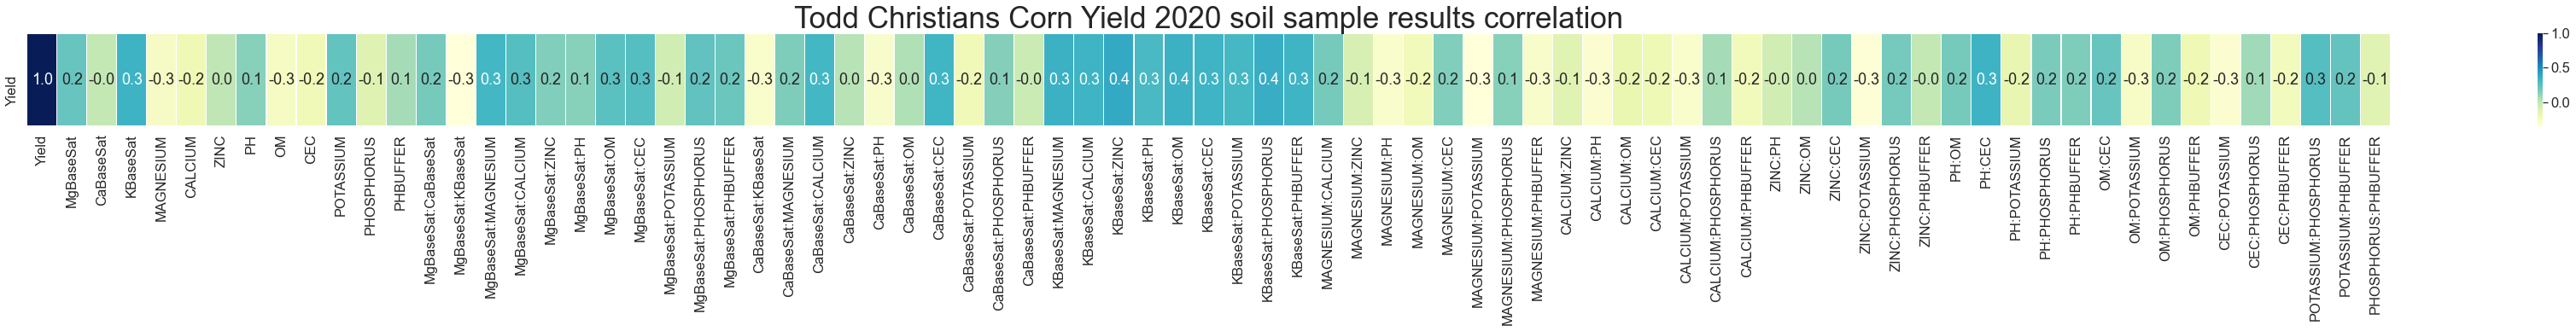

In [173]:
firstColumn = corr.loc[['Yield']]

fig = plt.figure(figsize=(62,2))
ax = fig.add_subplot(111)
plt.title('Todd Christians Corn Yield 2020 soil sample results correlation', fontsize=35)
sb.set(font_scale=1.5)


corrMap = sb.heatmap(firstColumn, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.1)



plt.show()

In [174]:
whatICareAbout.shape

(552, 79)

In [175]:
sortedCare = whatICareAbout.sort_values('Yield', ascending=False)

In [176]:
top = sortedCare[:25]
bottom = sortedCare[-25:]

In [177]:
top.head()

Yield  MgBaseSat  CaBaseSat  KBaseSat  MAGNESIUM  CALCIUM  ZINC  \
23  239.156333       18.7       70.3       3.3      531.0   3311.0  4.45   
5   238.257643       15.6       58.2       2.0      573.0   3542.0  3.12   
17  237.350683       20.4       68.8       2.9      585.0   3278.0  4.60   
44  237.079786       20.4       69.3       4.6      561.0   3168.0  5.69   
40  236.967246       24.6       69.4       3.6      573.0   2684.0  3.63   

      PH   OM   CEC  ...    OM:CEC  OM:POTASSIUM  OM:PHOSPHORUS  OM:PHBUFFER  \
23  6.57  4.9  21.7  ...  0.225806      0.016610       0.087500     0.679612   
5   5.55  5.0  23.1  ...  0.216450      0.021552       0.086207     0.729927   
17  6.55  4.9  21.9  ...  0.223744      0.018216       0.069014     0.672154   
44  6.80  4.9  21.6  ...  0.226852      0.012010       0.069014     0.669399   
40  7.30  4.7  18.9  ...  0.248677      0.017343       0.225962     0.634278   

    CEC:POTASSIUM  CEC:PHOSPHORUS  CEC:PHBUFFER  POTASSIUM:PHOSPHORUS  \
23       0.073559        0.387500      3.009709              5.267857   
5        0.099569        0.398276      3.372263              4.000000   
17       0.081413        0.308451      3.004115              3.788732   
44       0.052941        0.304225      2.950820              5.746479   
40       0.069742        0.908654      2.550607             13.028846   

    POTASSIUM:PHBUFFER  PHOSPHORUS:PHBUFFER  
23           40.915395             7.766990  
5            33.868613             8.467153  
17           36.899863             9.739369  
44           55.737705             9.699454  
40           36.572200             2.807018  

[5 rows x 79 columns]

In [178]:
bottom.head()


Yield  MgBaseSat  CaBaseSat  KBaseSat  MAGNESIUM  CALCIUM  ZINC    PH  \
5  192.715561       15.6       58.2       2.0      573.0   3542.0  3.12  5.55   
4  192.037142       19.5       69.4       2.1      621.0   3674.0  3.72  6.43   
5  191.559247       15.6       58.2       2.0      573.0   3542.0  3.12  5.55   
5  191.210284       15.6       58.2       2.0      573.0   3542.0  3.12  5.55   
1  190.581514       16.8       75.9       2.2      515.0   3869.0  3.88  6.89   

    OM   CEC  ...    OM:CEC  OM:POTASSIUM  OM:PHOSPHORUS  OM:PHBUFFER  \
5  5.0  23.1  ...  0.216450      0.021552       0.086207     0.729927   
4  4.9  24.1  ...  0.203320      0.022685       0.119512     0.674003   
5  5.0  23.1  ...  0.216450      0.021552       0.086207     0.729927   
5  5.0  23.1  ...  0.216450      0.021552       0.086207     0.729927   
1  4.8  24.2  ...  0.198347      0.022120       0.123077     0.650407   

   CEC:POTASSIUM  CEC:PHOSPHORUS  CEC:PHBUFFER  POTASSIUM:PHOSPHORUS  \
5       0.099569        0.398276      3.372263              4.000000   
4       0.111574        0.587805      3.314993              5.268293   
5       0.099569        0.398276      3.372263              4.000000   
5       0.099569        0.398276      3.372263              4.000000   
1       0.111521        0.620513      3.279133              5.564103   

   POTASSIUM:PHBUFFER  PHOSPHORUS:PHBUFFER  
5           33.868613             8.467153  
4           29.711142             5.639615  
5           33.868613             8.467153  
5           33.868613             8.467153  
1           29.403794             5.284553  

[5 rows x 79 columns]

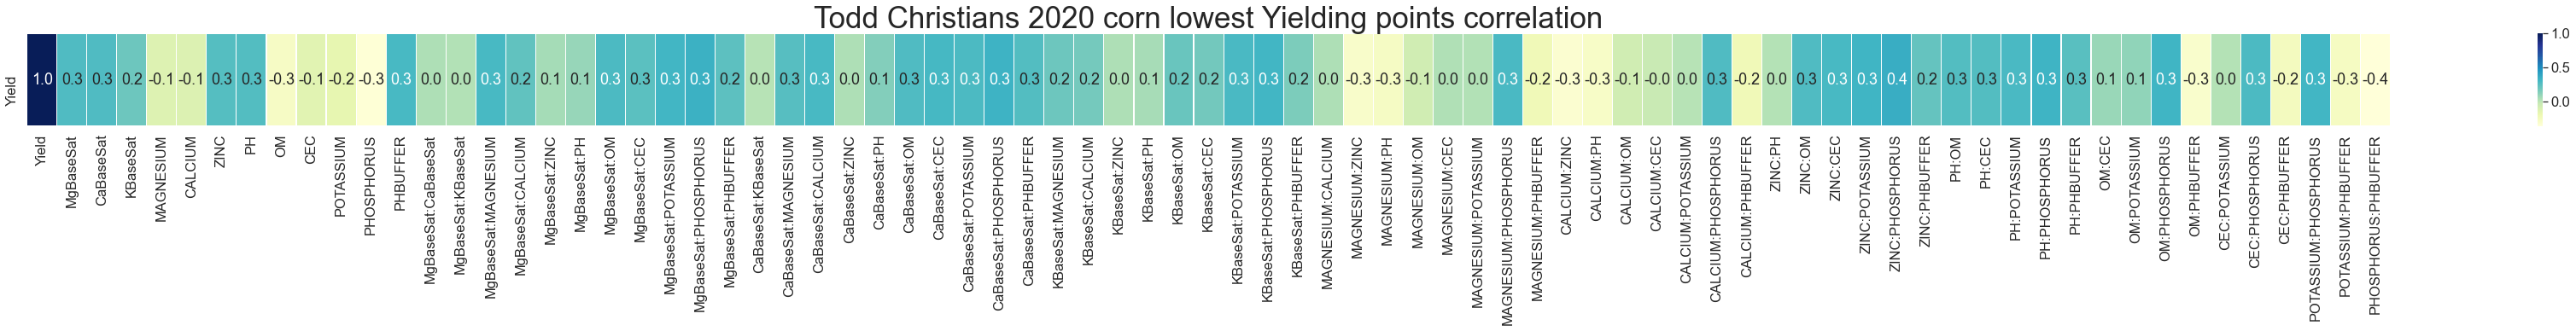

In [179]:
corr = bottom.corr()
firstColumn = corr.loc[['Yield']]

fig = plt.figure(figsize=(62,2))
ax = fig.add_subplot(111)
plt.title('Todd Christians 2020 corn lowest Yielding points correlation', fontsize=35)
sb.set(font_scale=1.5)


corrMap = sb.heatmap(firstColumn, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.1)



plt.show()

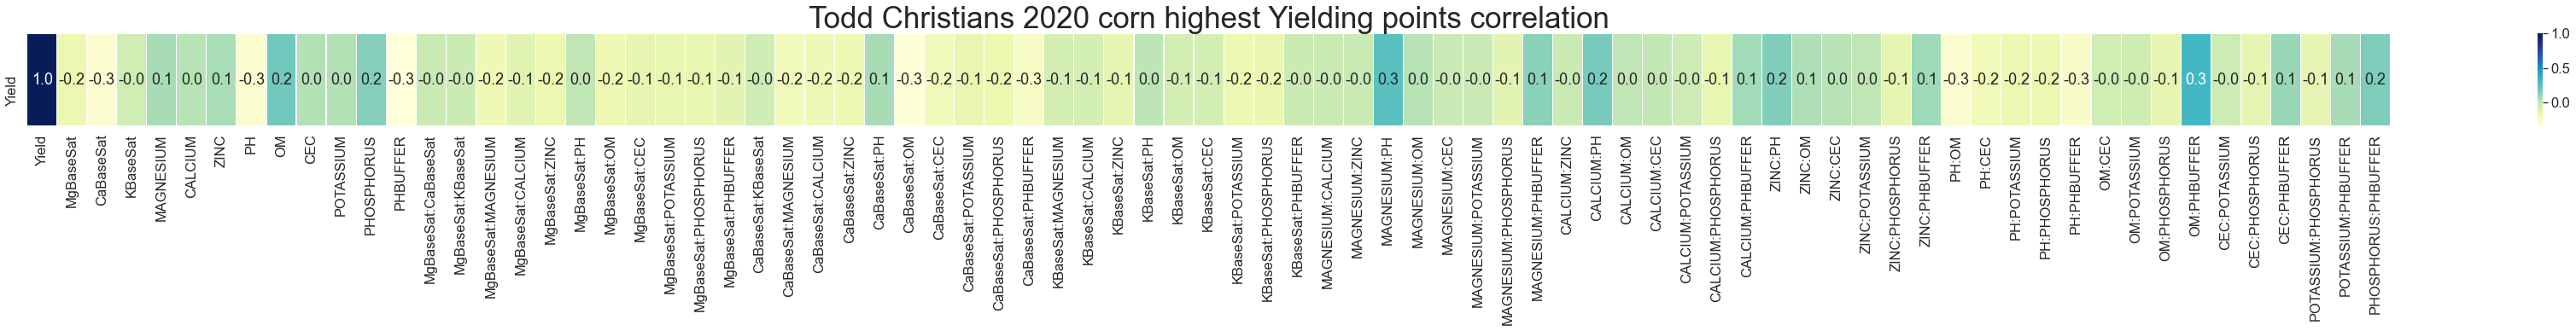

In [180]:
corr = top.corr()
firstColumn = corr.loc[['Yield']]

fig = plt.figure(figsize=(62,2))
ax = fig.add_subplot(111)
plt.title('Todd Christians 2020 corn highest Yielding points correlation', fontsize=35)
sb.set(font_scale=1.5)


corrMap = sb.heatmap(firstColumn, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.1)




plt.show()

In [181]:
avgTop = top.mean()
avgBottom = bottom.mean()

In [182]:
bestWorse = avgTop - avgBottom

In [183]:
avgTop.head(15)


Yield                   232.849987
MgBaseSat                20.060000
CaBaseSat                69.032000
KBaseSat                  3.352000
MAGNESIUM               528.520000
CALCIUM                3052.280000
ZINC                      3.968400
PH                        6.677600
OM                        4.824000
CEC                      20.384000
POTASSIUM               279.400000
PHOSPHORUS               48.596000
PHBUFFER                  7.276000
MgBaseSat:CaBaseSat       0.291540
MgBaseSat:KBaseSat        6.301022
dtype: float64

In [184]:
avgBottom.head(15)

Yield                   188.021013
MgBaseSat                17.796000
CaBaseSat                67.116000
KBaseSat                  2.260000
MAGNESIUM               563.120000
CALCIUM                3533.400000
ZINC                      3.522000
PH                        6.276400
OM                        4.900000
CEC                      22.948000
POTASSIUM               226.640000
PHOSPHORUS               48.420000
PHBUFFER                  7.157200
MgBaseSat:CaBaseSat       0.265974
MgBaseSat:KBaseSat        7.954264
dtype: float64

In [185]:
bestWorse.to_csv('bestWorse1.csv')
os.getcwd()

'c:\\Users\\levio\\Dropbox\\Personal\\MyPythonScripts\\agYieldData\\shapefiles'

In [186]:
sample_data['KBaseSat'].mean()

2.782222222222222

In [187]:
allCSV = pd.concat([avgTop, avgBottom], axis=1)

In [188]:
allCSV.rename(columns={0:'Average for top 25', 1:'Average for bottom 25'})

Average for top 25  Average for bottom 25
Yield                         232.849987             188.021013
MgBaseSat                      20.060000              17.796000
CaBaseSat                      69.032000              67.116000
KBaseSat                        3.352000               2.260000
MAGNESIUM                     528.520000             563.120000
...                                  ...                    ...
CEC:PHOSPHORUS                  0.485058               0.489872
CEC:PHBUFFER                    2.803425               3.209418
POTASSIUM:PHOSPHORUS            6.490059               4.827438
POTASSIUM:PHBUFFER             38.403872              31.711050
PHOSPHORUS:PHBUFFER             6.695683               6.797823

[79 rows x 2 columns]

In [189]:
allCSV.to_csv('TopvsBottom.csv')

In [190]:
###### dads home place for 2019 which is beans###############################################################################################


In [191]:
db19 = gpd.read_file('christiansYieldData\zippedFiles\dadsHome19.zip')

<AxesSubplot:>

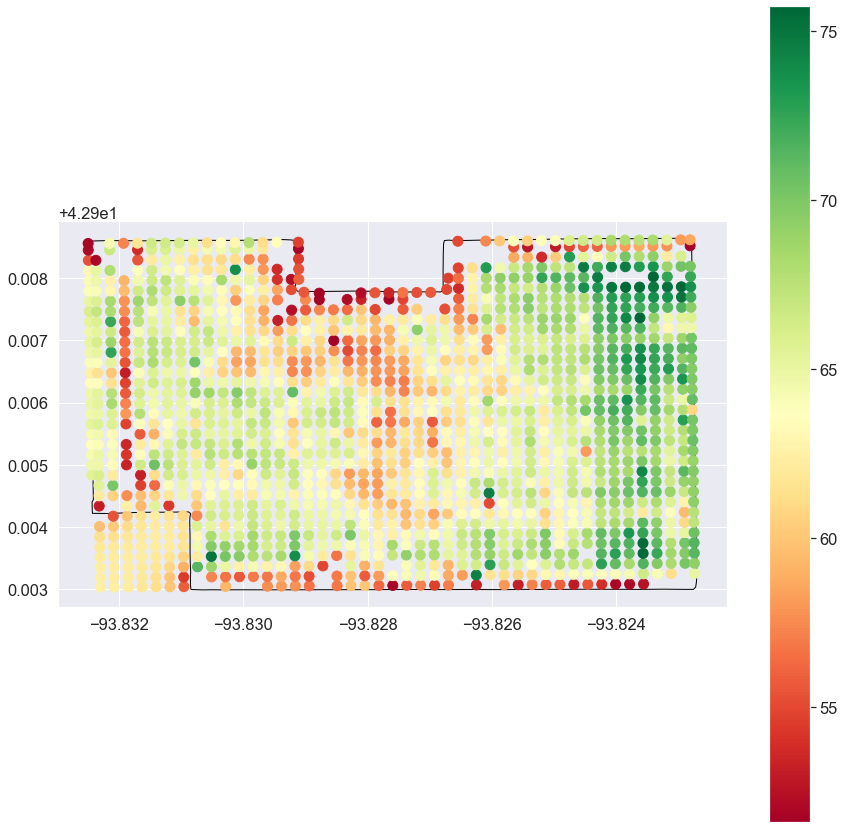

In [192]:
ax = data.plot(legend=True, edgecolor='black', facecolor='none', figsize=(15,15))
db19.plot(cmap='RdYlGn', legend=True, column='Yield', ax=ax, markersize=100)


<AxesSubplot:>

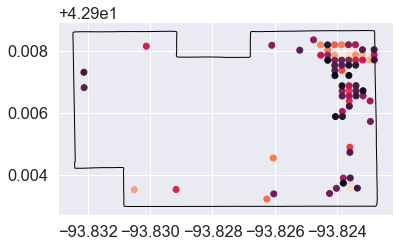

In [193]:
sorted12 = db19.sort_values('Yield', ascending=False)
ax = data.plot(legend=True, edgecolor='black', facecolor='none')
sorted12[:75].plot(ax=ax, column='Yield')

In [194]:
db19.crs = 'epsg:3857'
db19.to_crs('epsg:3857')
db19.sort_values('Yield', ascending=False)

Crop      Yield  Ident    RelYield                    geometry
1313  Soybeans  75.734650      0  100.000000  POINT (-93.82362 42.90736)
1282  Soybeans  75.726569      0   99.989330  POINT (-93.82385 42.90785)
1350  Soybeans  75.695953      0   99.948904  POINT (-93.82340 42.90802)
1416  Soybeans  75.641358      0   99.876817  POINT (-93.82295 42.90786)
1316  Soybeans  75.586834      0   99.804824  POINT (-93.82363 42.90786)
...        ...        ...    ...         ...                         ...
585   Soybeans  51.758157      0   68.341449  POINT (-93.82878 42.90765)
23    Soybeans  51.753706      0   68.335572  POINT (-93.83249 42.90856)
586   Soybeans  51.708339      0   68.275669  POINT (-93.82878 42.90776)
1451  Soybeans  51.645932      0   68.193267  POINT (-93.82281 42.90852)
610   Soybeans  51.608352      0   68.143646  POINT (-93.82854 42.90700)

[1453 rows x 5 columns]

In [195]:
newDB19 = gpd.sjoin(temp, db19)

In [196]:
whatICareAbout = newDB19[['Yield','MgBaseSat', 'CaBaseSat', 'KBaseSat',
       'MAGNESIUM', 'CALCIUM', 'ZINC', 'PH', 'OM', 'CEC', 'POTASSIUM',
       'PHOSPHORUS', 'PHBUFFER',]]

In [197]:
for j in range(len(ratioList) - 1):
    for i in range(len(ratioList) - j - 1):
        whatICareAbout['%s:%s' % (ratioList[j], ratioList[j+1+i])] = whatICareAbout[ratioList[j]]/whatICareAbout[ratioList[j+i+1]]

ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [198]:
whatICareAbout.head()

Yield  MgBaseSat  CaBaseSat  KBaseSat  MAGNESIUM  CALCIUM  ZINC    PH  \
0  75.586834       18.4       71.4       2.1      585.0   3762.0  3.76  6.53   
0  74.837407       18.4       71.4       2.1      585.0   3762.0  3.76  6.53   
0  75.204455       18.4       71.4       2.1      585.0   3762.0  3.76  6.53   
0  75.695953       18.4       71.4       2.1      585.0   3762.0  3.76  6.53   
0  72.496063       18.4       71.4       2.1      585.0   3762.0  3.76  6.53   

    OM   CEC  ...    OM:CEC  OM:POTASSIUM  OM:PHOSPHORUS  OM:PHBUFFER  \
0  4.8  24.2  ...  0.198347       0.02212       0.088889     0.655738   
0  4.8  24.2  ...  0.198347       0.02212       0.088889     0.655738   
0  4.8  24.2  ...  0.198347       0.02212       0.088889     0.655738   
0  4.8  24.2  ...  0.198347       0.02212       0.088889     0.655738   
0  4.8  24.2  ...  0.198347       0.02212       0.088889     0.655738   

   CEC:POTASSIUM  CEC:PHOSPHORUS  CEC:PHBUFFER  POTASSIUM:PHOSPHORUS  \
0       0.111521        0.448148      3.306011              4.018519   
0       0.111521        0.448148      3.306011              4.018519   
0       0.111521        0.448148      3.306011              4.018519   
0       0.111521        0.448148      3.306011              4.018519   
0       0.111521        0.448148      3.306011              4.018519   

   POTASSIUM:PHBUFFER  PHOSPHORUS:PHBUFFER  
0           29.644809             7.377049  
0           29.644809             7.377049  
0           29.644809             7.377049  
0           29.644809             7.377049  
0           29.644809             7.377049  

[5 rows x 79 columns]

In [199]:
corr = whatICareAbout.corr()
import seaborn as sb

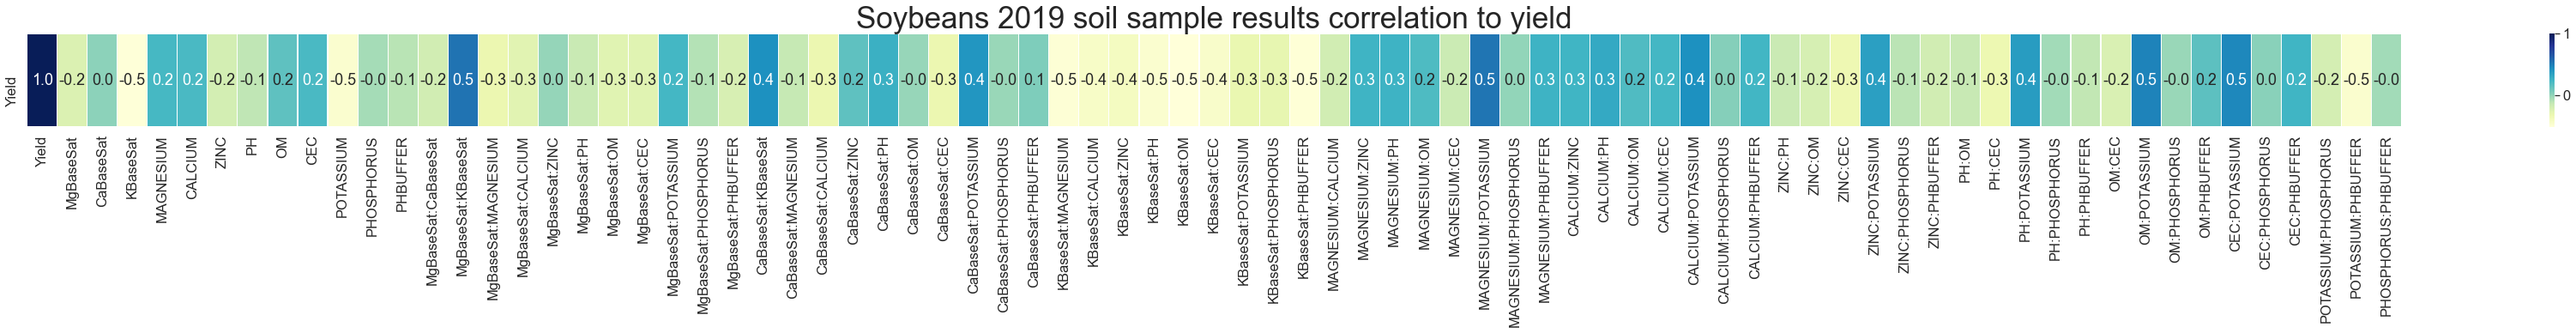

In [200]:
firstColumn = corr.loc[['Yield']]

fig = plt.figure(figsize=(62,2))
ax = fig.add_subplot(111)
plt.title('Soybeans 2019 soil sample results correlation to yield', fontsize=35)
sb.set(font_scale=1.5)


corrMap = sb.heatmap(firstColumn, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.1)



plt.show()

In [201]:
sortedCare = whatICareAbout.sort_values('Yield', ascending=False)
top = sortedCare[:25]
bottom = sortedCare[-25:]

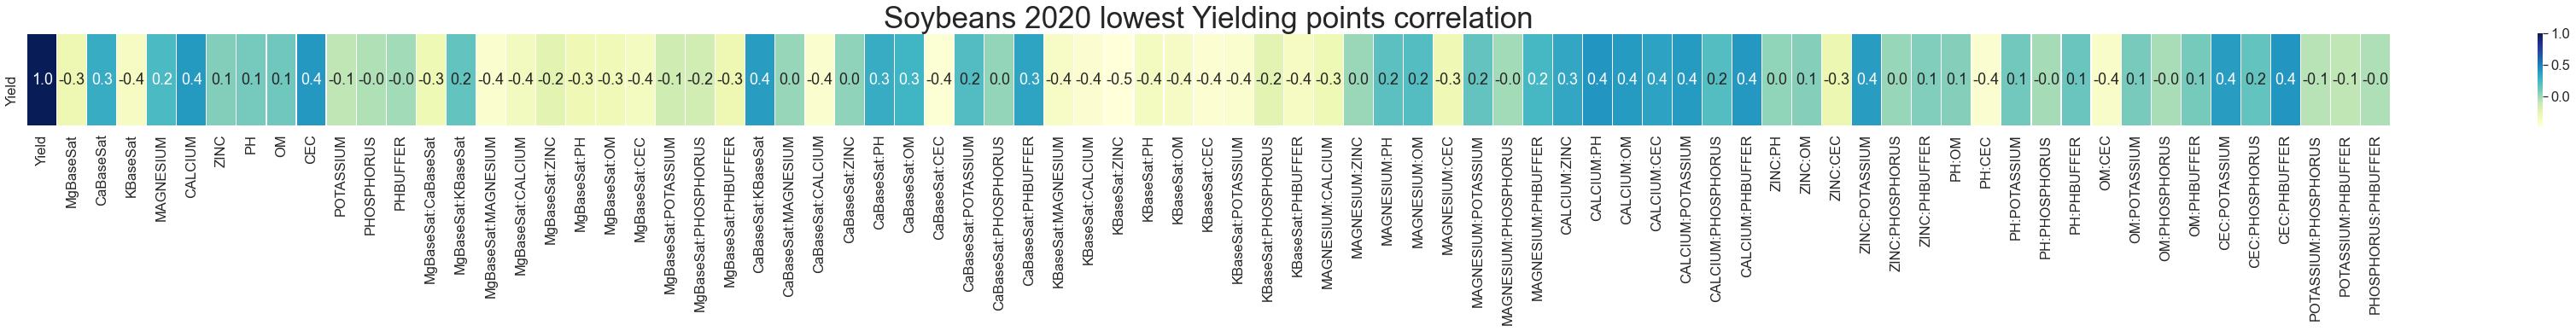

In [202]:
corr = bottom.corr()
firstColumn = corr.loc[['Yield']]

fig = plt.figure(figsize=(62,2))
ax = fig.add_subplot(111)
plt.title('Soybeans 2020 lowest Yielding points correlation', fontsize=35)
sb.set(font_scale=1.5)


corrMap = sb.heatmap(firstColumn, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.1)



plt.show()

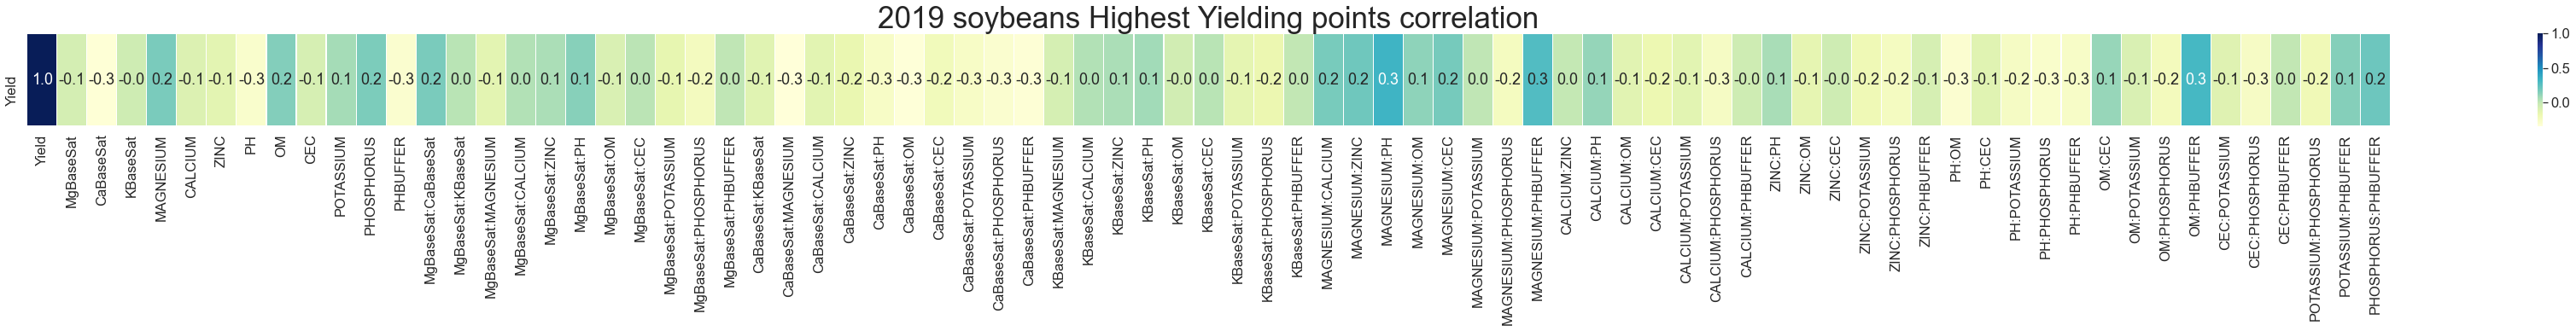

In [203]:
corr = top.corr()
firstColumn1 = corr.loc[['Yield']]

fig = plt.figure(figsize=(62,2))
ax = fig.add_subplot(111)
plt.title('2019 soybeans Highest Yielding points correlation', fontsize=35)
sb.set(font_scale=1.5)


corrMap = sb.heatmap(firstColumn1, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.1)




plt.show()

In [204]:
lowVsHigh = pd.concat([firstColumn, firstColumn1])

In [205]:
avgTop = top.mean()
avgBottom = bottom.mean()

In [206]:
bestWorse = avgTop - avgBottom

In [207]:
allCSV = pd.concat([avgTop, avgBottom], axis=1)

In [208]:
bestWorse.to_csv('Dads2019BestVSWorst.csv')

In [209]:
allCSV.to_csv('DadsBestWorstValues.csv')

In [210]:
allCSV.rename(columns={0:'high', 1:'low'}, inplace=True)

In [211]:
allCSV.head()

high         low
Yield       74.106111   54.688395
MgBaseSat   17.764000   20.796000
CaBaseSat   71.484000   68.904000
KBaseSat     2.204000    3.560000
MAGNESIUM  556.680000  532.720000